# Multi Layer Perceptron


<img src="./img/neural_net.gif"
     alt="Perceptron"
     style="width: 450px;" />


## Neural Architecture



#### **1 Layer Network** 
<img src="./img/perceptron.jpeg"
     alt="Perceptron"
     style="width: 300px;" />
- Simplest unit Perceptron
- Only one output unit
- No hidden units
- Input is not counted in layers



#### **2 Layer Network** 
<img src="./img/1one_white.png"
     alt="Perceptron"
     style="width: 450px;" />

- Two layers : 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net




#### **3 Layer Network** 
<img src="./img/2two_white.png"
     alt="Perceptron"
     style="width: 550px;" />

- 3 layers : 2 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

 






### Implementation

In [67]:
import numpy as np

In [68]:
# W(i,j) : means weight connecting ith neuron in layer L-1 to jth neuron in layer L
def softmax(a):
    ea = np.exp(a)
    ans = ea/np.sum(ea,axis=1,keepdims=True)
    return ans

In [69]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        # 1st layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['B1'] = np.zeros((1,layers[0]))
        # 2nd layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['B2'] = np.zeros((1,layers[1]))
        # Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['B3'] = np.zeros((1,output_size))
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,lr=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_ = self.activation_outputs
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        # Update parameters using Gradient Descent
        self.model['W1'] -= lr*dw1
        self.model['B1'] -= lr*db1
        self.model['W2'] -= lr*dw2
        self.model['B2'] -= lr*db2
        self.model['W3'] -= lr*dw3
        self.model['B3'] -= lr*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

In [70]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

### Generating Dataset

In [87]:
from sklearn.datasets import make_circles,make_moons,make_classification
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [88]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
print(X.shape,Y.shape)

(500, 2) (500,)


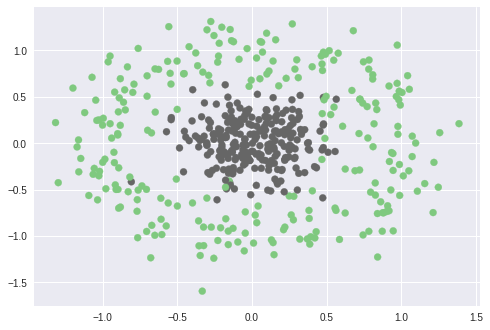

In [89]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Training The Model

In [90]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [91]:
def train(X,Y,model,epochs,lr,logs=True):
    losses = []
    classes = 2
    Y_oht = one_hot(Y,classes)
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_oht,Y_)
        losses.append(l)
        model.backward(X,Y_oht,lr)
        if logs:
            print("Iteration %d Loss %.4f"%(ix,l))
    return losses

In [92]:
losses = train(X,Y,model,500,0.001,False)

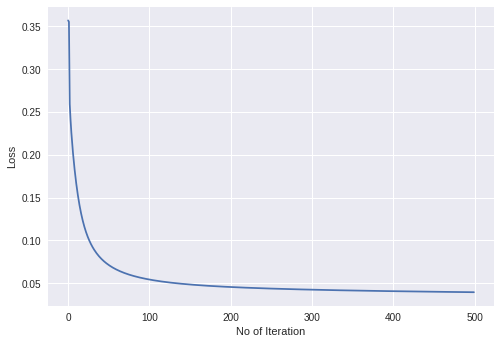

In [93]:
plt.plot(losses)
plt.xlabel("No of Iteration")
plt.ylabel("Loss")
plt.show()

### Visualizing The Decision Boundary

In [94]:
from visualize import plot_decision_boundary

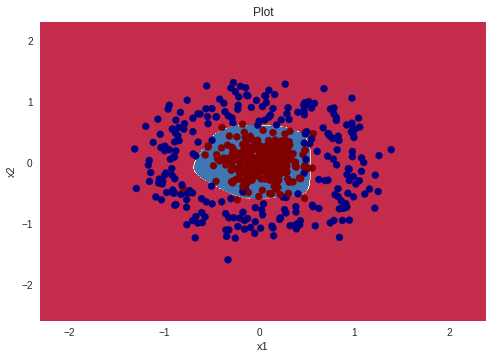

In [95]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [96]:
outputs = model.predict(X)
train_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Accuracy %.4f"%(train_accuracy*100))

Accuracy 97.0000


## XOR Dataset

In [97]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [98]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [99]:
losses = train(X,Y,model,700,0.01,False)

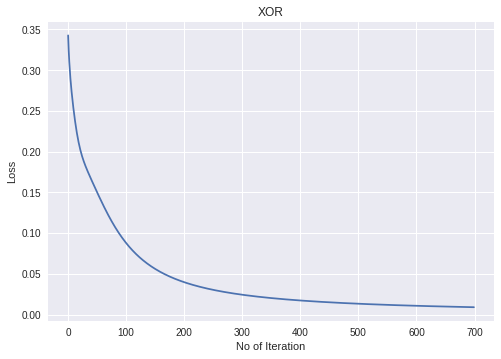

In [100]:
plt.plot(losses)
plt.title('XOR')
plt.xlabel("No of Iteration")
plt.ylabel("Loss")
plt.show()

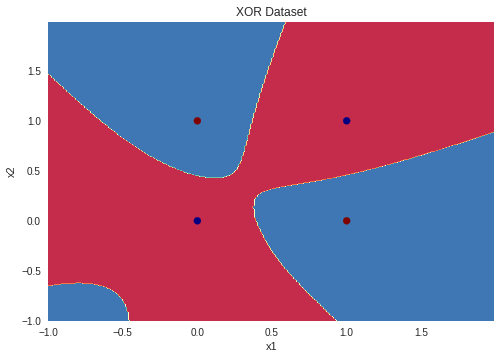

In [101]:
plot_decision_boundary(lambda x:model.predict(x),X,Y,title='XOR Dataset')

### Testing Model on Different Datasets

In [105]:
def load_dataset(dataset):
    if dataset=='Moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='Circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='Classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else: # XOR Dataset
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([0,1,1,0])
    return X,Y

Training Accuracy on XOR Dataset is 100.0000


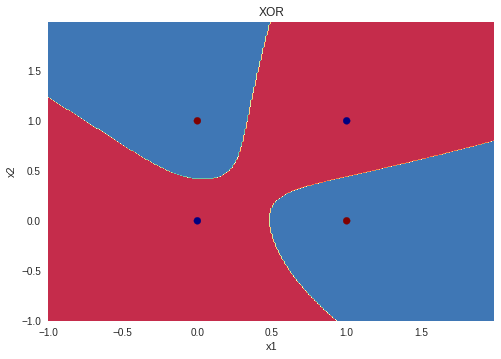

Training Accuracy on Classification Dataset is 96.0000


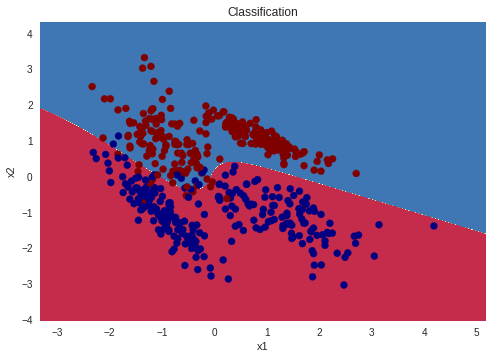

Training Accuracy on Moons Dataset is 97.4000


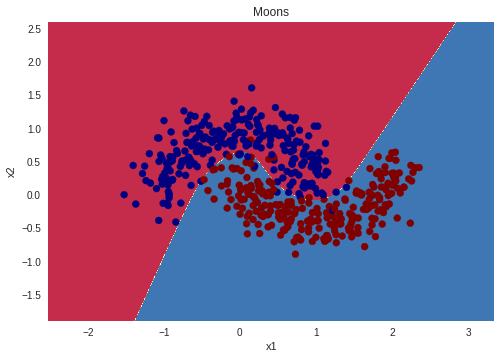

Training Accuracy on Circles Dataset is 96.4000


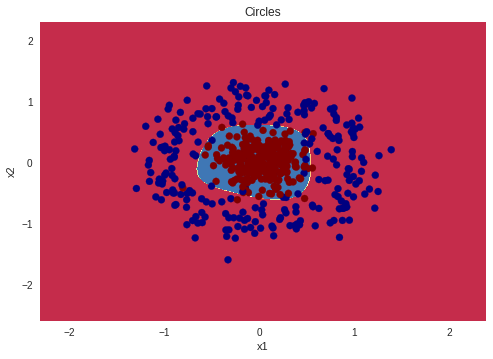

In [109]:
datasets = ["XOR","Classification","Moons","Circles"]
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy on %s Dataset is %.4f"%(d,training_accuracy*100))
    plot_decision_boundary(lambda x:model.predict(x),X,Y,title=d)
    plt.show()